In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. 
The classification goal is to predict whether the patient has 10-year risk of future $Coronary$ $Heart$ $Disease$ (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [2]:
df0=pd.read_csv('dataset cvd - framingham.csv')
df0

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df0.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
print(df0.shape)
print(df0.columns)

(4238, 16)
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


$Dealing with Null Values$

In [6]:
df1=df0.dropna()
df2=df1.drop_duplicates()
#df.isnull().sum()
df3=df2.reset_index(drop=True)
df3.to_csv('framinghamCVD_cleaned.csv')
df3

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3654,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)
patients=df3.index
health_parameters=df3.columns
df3.rename_axis("Patients", axis='rows').rename_axis("Health Parameters", axis='columns')


Health Parameters,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Patients,,,,,,,,,,,,,,,,
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
3652,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
3653,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1


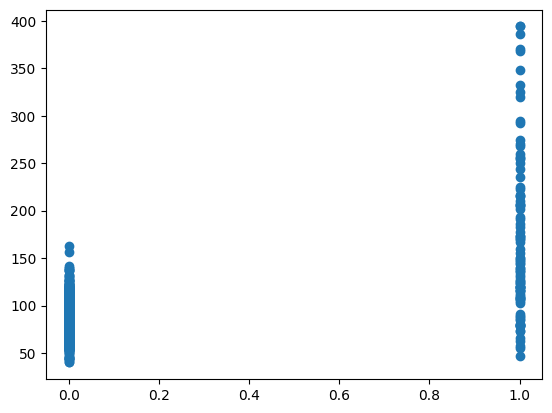

In [8]:
plt.scatter(df3.diabetes,df3.glucose)
plt.show()

$Sampling$

$Feature$ $Subset$ $Selection$

Here,we are using Univariate Filter method by removing the features which are not important for the model,i.e. features with the least variance.

In [9]:
pd.set_option('display.float_format', '{:.6f}'.format)
# Assuming 'column_name' is the column from which you want to get the smallest values
variance=df3.var()
print(variance.nsmallest(3))

prevalentStroke   0.005713
diabetes          0.026353
BPMeds            0.029447
dtype: float64


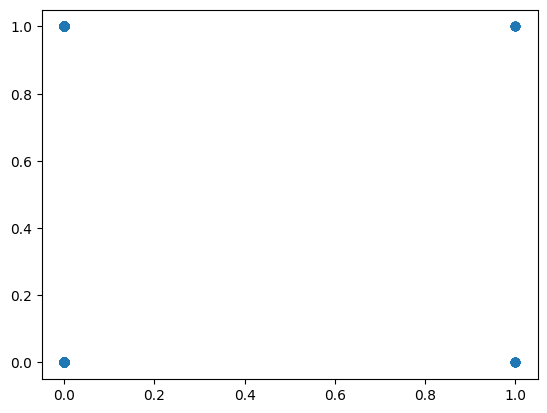

In [10]:
plt.scatter(df3.prevalentStroke,df3.TenYearCHD)
plt.show()

In [11]:
health_parameters=list(health_parameters)
health_parameters.remove('prevalentStroke')
df3 = df3.drop(['prevalentStroke'], axis=1)#ALso dropped 'prevalentStroke from health_parameters,i.e. list of columns
df3

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0,0.000000,0.000000,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3.000000,0,0.000000,0.000000,1,0,187.000000,141.000000,81.000000,24.960000,80.000000,81.000000,0
3652,1,68,1.000000,0,0.000000,0.000000,1,0,176.000000,168.000000,97.000000,23.140000,60.000000,79.000000,1
3653,1,50,1.000000,1,1.000000,0.000000,1,0,313.000000,179.000000,92.000000,25.970000,66.000000,86.000000,1
3654,1,51,3.000000,1,43.000000,0.000000,0,0,207.000000,126.500000,80.000000,19.710000,65.000000,68.000000,0


Now,We apply Wrapper methods to select the best features for the model.

In [12]:
# Assuming df is your DataFrame
corr_matrix = df3.corr().abs()
corr_matrix

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,0.024387,0.017677,0.206778,0.331243,0.052128,0.000806,0.013833,0.070229,0.045484,0.051575,0.072867,0.114923,0.003048,0.091745
age,0.024387,1.000000,0.158961,0.210862,0.189099,0.134670,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,0.002685,0.118245,0.233810
education,0.017677,0.158961,1.000000,0.025253,0.013527,0.013647,0.079100,0.039547,0.012956,0.124511,0.058502,0.137280,0.064254,0.031874,0.063068
currentSmoker,0.206778,0.210862,0.025253,1.000000,0.773819,0.051936,0.107561,0.041859,0.051119,0.134371,0.115748,0.159574,0.050452,0.053346,0.019176
cigsPerDay,0.331243,0.189099,0.013527,0.773819,1.000000,0.046479,0.069890,0.036934,0.030222,0.094764,0.056650,0.086888,0.063549,0.053803,0.052159
BPMeds,0.052128,0.134670,0.013647,0.051936,0.046479,1.000000,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentHyp,0.000806,0.306693,0.079100,0.107561,0.069890,0.263047,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,0.039547,0.041859,0.036934,0.049051,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,0.070229,0.267764,0.012956,0.051119,0.030222,0.094011,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127
sysBP,0.045484,0.388551,0.124511,0.134371,0.094764,0.271291,0.697790,0.102574,0.220130,1.000000,0.786727,0.331004,0.184901,0.134702,0.222885


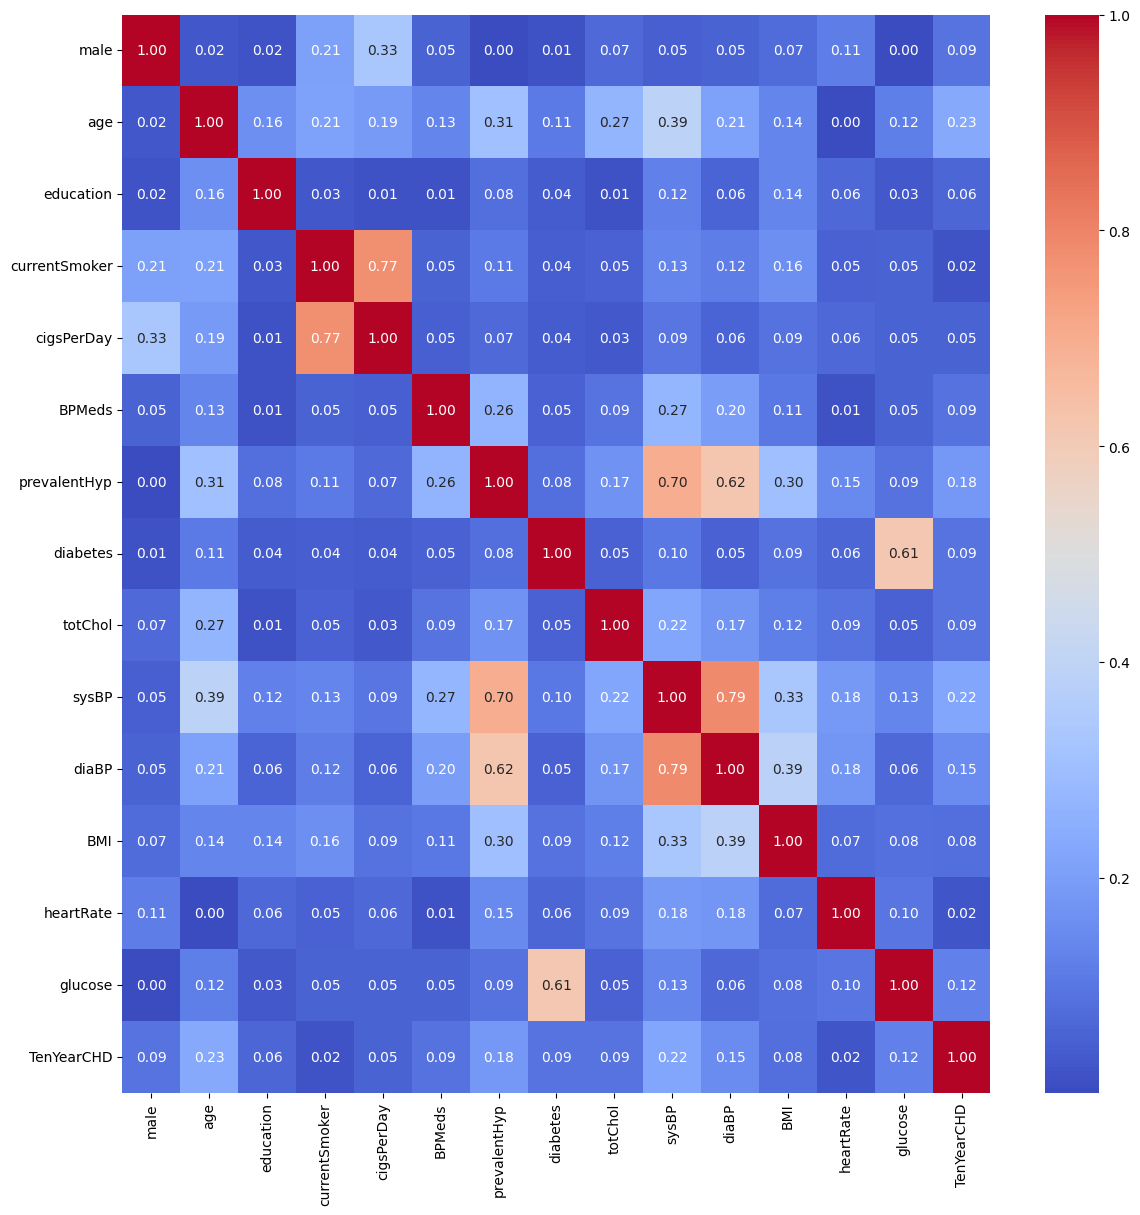

In [13]:
fig_dims = (14, 14)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

This shows the correlation coefficient between each unique pair of features in the dataset.

In [14]:
correlation={}#Dictionary with attributes and their correlation in descending order
for i in range(0, len(health_parameters)):
    for j in range(0, i):
            correlation[(health_parameters[i], health_parameters[j])]=corr_matrix.loc[health_parameters[i], health_parameters[j]]
sorted_correlation = dict(sorted(correlation.items(), key=lambda item: item[1],reverse=True))
sorted_correlation

{('diaBP', 'sysBP'): 0.7867271218652642,
 ('cigsPerDay', 'currentSmoker'): 0.7738189372482994,
 ('sysBP', 'prevalentHyp'): 0.6977899528655885,
 ('diaBP', 'prevalentHyp'): 0.617634221677018,
 ('glucose', 'diabetes'): 0.6148174441322215,
 ('sysBP', 'age'): 0.3885505988687022,
 ('BMI', 'diaBP'): 0.3856106779899647,
 ('cigsPerDay', 'male'): 0.3312428456443405,
 ('BMI', 'sysBP'): 0.33100358987482476,
 ('prevalentHyp', 'age'): 0.3066929974598801,
 ('BMI', 'prevalentHyp'): 0.3029168279134485,
 ('sysBP', 'BPMeds'): 0.27129113074113065,
 ('totChol', 'age'): 0.26776368401057793,
 ('prevalentHyp', 'BPMeds'): 0.26304685599848165,
 ('TenYearCHD', 'age'): 0.23381045046891855,
 ('TenYearCHD', 'sysBP'): 0.22288534193220752,
 ('sysBP', 'totChol'): 0.22012958127064888,
 ('currentSmoker', 'age'): 0.2108623680670528,
 ('diaBP', 'age'): 0.20888036151774653,
 ('currentSmoker', 'male'): 0.2067779295380288,
 ('diaBP', 'BPMeds'): 0.1997503069579374,
 ('cigsPerDay', 'age'): 0.18909948960681483,
 ('heartRate', '

Though Systole and Diastole blood pressure are highly correlated, we can't remove any of them as both are important to determine the disease and hence,needed for the model.

Since the correlation of currentSmoker and cigsPerDay is 0.77(greater than threshold(=0.6)), we can remove one of the features by $Pearson$ $Correlation$.

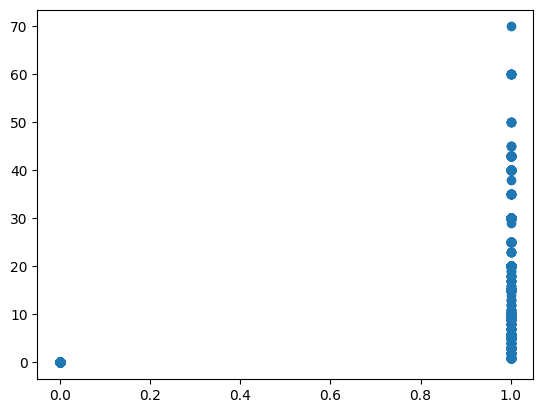

In [15]:
plt.scatter(df3.currentSmoker,df3.cigsPerDay)
plt.show()

In [16]:
df3.drop(['currentSmoker'], axis=1, inplace=True)
df3

,male,age,education,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0.000000,0.000000,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0.000000,0.000000,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,20.000000,0.000000,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,30.000000,0.000000,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,23.000000,0.000000,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,3.000000,0.000000,0.000000,1,0,187.000000,141.000000,81.000000,24.960000,80.000000,81.000000,0
3652,1,68,1.000000,0.000000,0.000000,1,0,176.000000,168.000000,97.000000,23.140000,60.000000,79.000000,1
3653,1,50,1.000000,1.000000,0.000000,1,0,313.000000,179.000000,92.000000,25.970000,66.000000,86.000000,1
3654,1,51,3.000000,43.000000,0.000000,0,0,207.000000,126.500000,80.000000,19.710000,65.000000,68.000000,0


Since the correlation of $education$ attribute is less than the threshold for almost all attributes and doesn't have any meaningful impact on the target variable, we can drop it from the dataframe.

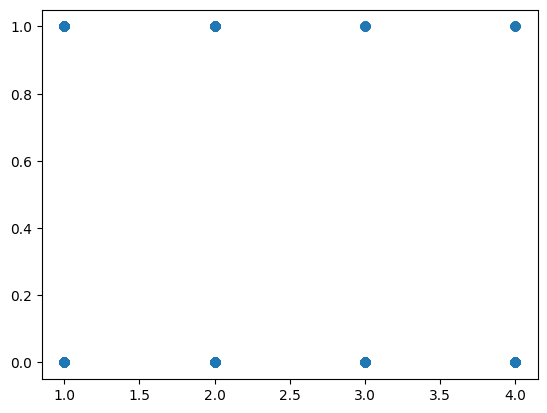

In [17]:
plt.scatter(df3.education,df3.TenYearCHD)
plt.show()

In [18]:
df3.drop(['education'], axis=1, inplace=True)
df3

,male,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.000000,0.000000,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,0.000000,0.000000,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,20.000000,0.000000,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,30.000000,0.000000,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,23.000000,0.000000,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,1,58,0.000000,0.000000,1,0,187.000000,141.000000,81.000000,24.960000,80.000000,81.000000,0
3652,1,68,0.000000,0.000000,1,0,176.000000,168.000000,97.000000,23.140000,60.000000,79.000000,1
3653,1,50,1.000000,0.000000,1,0,313.000000,179.000000,92.000000,25.970000,66.000000,86.000000,1
3654,1,51,43.000000,0.000000,0,0,207.000000,126.500000,80.000000,19.710000,65.000000,68.000000,0


$Wrapper$ $Methods$ : Forward 

In [19]:

data = df3.drop('TenYearCHD', axis=1)
target = df3['TenYearCHD']

In [20]:

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Create a linear regression model
linear_regression = LinearRegression()

# Create a forward feature selector
backward_feature_selector = SequentialFeatureSelector(linear_regression, n_features_to_select=11, direction='backward')

# Fit the forward feature selector to the data
backward_feature_selector.fit(data, target)

# Get the names of the selected features
selected_features = data.columns[backward_feature_selector.get_support()]

print(selected_features)

Index(['male', 'age', 'cigsPerDay', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


$Principal$ $Component$ $Analysis$